In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import copy

import pyproj
print(pyproj.datadir.get_data_dir())
pyproj.datadir.set_data_dir('/usr/local/anaconda3/envs/info615/share/proj')

/usr/local/anaconda3/envs/py36/share/proj


/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
#Load census data
df = pd.read_csv('data/raw_data/NYC_DECENNIALPL2020.P2_2022-04-20T183814/DECENNIALPL2020.P2_data_with_overlays_2022-04-20T183715.csv', skiprows = [1])
df.drop(0, inplace = True)

#Split out relevant part of GEOID
df['GEOID20'] = df['GEO_ID'].str.split('US').str[-1]

#Convert to numeric
cols_numeric = [col for col in df.columns if col not in ['GEO_ID','GEOID20', 'NAME']]
df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric)

df.head()


,GEO_ID,NAME,P2_001N,P2_002N,P2_003N,P2_004N,P2_005N,P2_006N,P2_007N,P2_008N,...,P2_065N,P2_066N,P2_067N,P2_068N,P2_069N,P2_070N,P2_071N,P2_072N,P2_073N,GEOID20
1,1000000US360010001001001,"Block 1001, Block Group 1, Census Tract 1, Alb...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360010001001001
2,1000000US360010001001002,"Block 1002, Block Group 1, Census Tract 1, Alb...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360010001001002
3,1000000US360010001001003,"Block 1003, Block Group 1, Census Tract 1, Alb...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360010001001003
4,1000000US360010001001004,"Block 1004, Block Group 1, Census Tract 1, Alb...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360010001001004
5,1000000US360010001001005,"Block 1005, Block Group 1, Census Tract 1, Alb...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360010001001005


In [3]:
df.shape

(326802, 76)

In [4]:
#Load block shapefile for all of state
block_gdf_all = gpd.read_file('data/raw_data/tl_2020_36_tabblock20/tl_2020_36_tabblock20.shp')

#Extract counties
block_gdf = block_gdf_all[block_gdf_all['COUNTYFP20'].isin(['005', '047', '061', '081', '085'])]
del block_gdf_all
block_gdf

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,HOUSING20,POP20,geometry
210,36,081,061200,1006,360810612001006,Block 1006,G5040,None,None,None,S,15445,0,+40.6898310,-073.7383273,29,81,"POLYGON ((-73.73834 40.69078, -73.73747 40.690..."
211,36,081,025401,1001,360810254011001,Block 1001,G5040,None,None,None,S,15623,0,+40.6969562,-073.7976293,57,198,"POLYGON ((-73.79786 40.69799, -73.79666 40.696..."
212,36,081,040200,1004,360810402001004,Block 1004,G5040,None,None,None,S,12598,0,+40.7002471,-073.7676934,24,78,"POLYGON ((-73.76858 40.69981, -73.76759 40.701..."
249,36,081,097204,3001,360810972043001,Block 3001,G5040,None,None,None,S,30537,0,+40.5936207,-073.7879986,343,719,"POLYGON ((-73.78913 40.59404, -73.78805 40.594..."
250,36,081,097206,2007,360810972062007,Block 2007,G5040,None,None,None,S,11730,0,+40.5960822,-073.7795514,8,36,"POLYGON ((-73.78015 40.59634, -73.77968 40.596..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288656,36,085,015400,0002,360850154000002,Block 0002,G5040,None,None,None,S,0,573262,+40.5373418,-074.1196857,0,0,"POLYGON ((-74.13371 40.52614, -74.12970 40.530..."
288667,36,047,031900,1000,360470319001000,Block 1000,G5040,None,None,None,S,5438,0,+40.6696770,-073.9491348,0,0,"POLYGON ((-73.95050 40.66986, -73.94773 40.669..."
288701,36,047,003400,0001,360470034000001,Block 0001,G5040,None,None,None,S,0,2570730,+40.6445395,-074.0466936,0,0,"POLYGON ((-74.05575 40.65148, -74.05536 40.652..."
288703,36,047,102802,0003,360471028020003,Block 0003,G5040,None,None,None,S,0,2825,+40.6227240,-073.8973003,0,0,"POLYGON ((-73.89826 40.62299, -73.89672 40.622..."


In [5]:
#Merge - block_gdf includes only NYC, df is all of NY
race_gdf = block_gdf.merge(df, on = 'GEOID20', how = 'left')

#Check - should return nothing
race_gdf[race_gdf['geometry'].isna()]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,P2_064N,P2_065N,P2_066N,P2_067N,P2_068N,P2_069N,P2_070N,P2_071N,P2_072N,P2_073N


<AxesSubplot:>

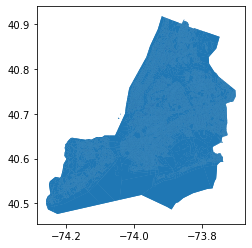

In [6]:
race_gdf.plot()

### Need to clip the blocks at the shoreline

In [7]:
borough_gdf = gpd.read_file('data/raw_data/Borough Boundaries/geo_export_1f0f1e34-b53d-4bba-9a46-60c7a408e3c5.shp')


In [8]:
borough_gdf = borough_gdf.to_crs(4326)

In [9]:
race_gdf = race_gdf.to_crs(4326)

In [10]:
print(borough_gdf.crs)
print(race_gdf.crs)

epsg:4326
epsg:4326


In [11]:
race_gdf = race_gdf.clip(borough_gdf.dissolve())

<AxesSubplot:>

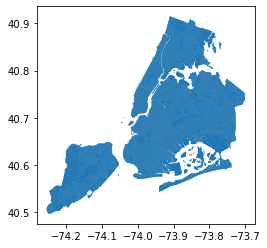

In [12]:
race_gdf.plot()

In [23]:
race_gdf.shape

(75736, 93)

In [13]:
#Load dictionary to group columns into racial groups
race_dict = pd.read_csv('data/raw_data/includeshispanic_DECENNIALPL2020.P2_2022-03-09T103623/DECENNIALPL2020.P2_metadata_2022-01-07T105823_GROUPED.csv')

#Subset the groups we want to plot
race_groups_plot = ['hispanic', 'nh_white', 'nh_black', 'nh_asian_pacific', 'nh_native', 'nh_other', 'nh_multiple']
race_dict_sub = race_dict[race_dict['race_group'].isin(race_groups_plot)]
race_dict_sub

,var_name,var_description,race_group
1,P2_002N,!!Total:!!Hispanic or Latino,hispanic
4,P2_005N,!!Total:!!Not Hispanic or Latino:!!Population...,nh_white
5,P2_006N,!!Total:!!Not Hispanic or Latino:!!Population...,nh_black
6,P2_007N,!!Total:!!Not Hispanic or Latino:!!Population...,nh_native
7,P2_008N,!!Total:!!Not Hispanic or Latino:!!Population...,nh_asian_pacific
8,P2_009N,!!Total:!!Not Hispanic or Latino:!!Population...,nh_asian_pacific
9,P2_010N,!!Total:!!Not Hispanic or Latino:!!Population...,nh_other
10,P2_011N,!!Total:!!Not Hispanic or Latino:!!Population...,nh_multiple


In [14]:
#Merge in racial groups
race_agg_gdf = race_gdf[['GEOID20', 'NAME', 'geometry']]
race_grouped = race_dict_sub.groupby('race_group')
for race_group, group_df in race_grouped:
    cols_extract = list(group_df['var_name'].values)
    race_sub_gdf = race_gdf[cols_extract]
    
    #Sum (in case more than one column in race group)
    race_agg_gdf[race_group] = race_sub_gdf[cols_extract].sum(axis = 1)

race_agg_gdf

/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,GEOID20,NAME,geometry,hispanic,nh_asian_pacific,nh_black,nh_multiple,nh_native,nh_other,nh_white
5557,360850244020002,"Block 0002, Block Group 0, Census Tract 244.02...","MULTIPOLYGON (((-74.24964 40.49684, -74.24963 ...",0,0,0,0,0,0,0
5556,360850244020002,"Block 0002, Block Group 0, Census Tract 244.02...","MULTIPOLYGON (((-74.24964 40.49684, -74.24963 ...",0,0,0,0,0,0,0
74852,360850244020003,"Block 0003, Block Group 0, Census Tract 244.02...","POLYGON ((-74.24964 40.49684, -74.24964 40.496...",0,0,0,0,0,0,0
74853,360850244020003,"Block 0003, Block Group 0, Census Tract 244.02...","POLYGON ((-74.24964 40.49684, -74.24964 40.496...",0,0,0,0,0,0,0
74226,360850244020001,"Block 0001, Block Group 0, Census Tract 244.02...","MULTIPOLYGON (((-74.23247 40.50138, -74.23238 ...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1703,360050337001000,"Block 1000, Block Group 1, Census Tract 337, B...","POLYGON ((-73.89997 40.91213, -73.89979 40.912...",25,1,6,7,0,2,32
1467,360050337001002,"Block 1002, Block Group 1, Census Tract 337, B...","POLYGON ((-73.90120 40.91248, -73.90130 40.912...",26,1,0,3,0,0,3
1466,360050337001002,"Block 1002, Block Group 1, Census Tract 337, B...","POLYGON ((-73.90120 40.91248, -73.90130 40.912...",26,1,0,3,0,0,3
61009,360050337001001,"Block 1001, Block Group 1, Census Tract 337, B...","POLYGON ((-73.90211 40.91288, -73.90070 40.912...",41,10,8,5,0,3,103


In [15]:
#Sum the number of points I need in each polygon
race_agg_gdf['total_points'] = race_agg_gdf[race_groups_plot].sum(axis = 1)
race_agg_gdf.head()

/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GEOID20,NAME,geometry,hispanic,nh_asian_pacific,nh_black,nh_multiple,nh_native,nh_other,nh_white,total_points
5557,360850244020002,"Block 0002, Block Group 0, Census Tract 244.02...","MULTIPOLYGON (((-74.24964 40.49684, -74.24963 ...",0,0,0,0,0,0,0,0
5556,360850244020002,"Block 0002, Block Group 0, Census Tract 244.02...","MULTIPOLYGON (((-74.24964 40.49684, -74.24963 ...",0,0,0,0,0,0,0,0
74852,360850244020003,"Block 0003, Block Group 0, Census Tract 244.02...","POLYGON ((-74.24964 40.49684, -74.24964 40.496...",0,0,0,0,0,0,0,0
74853,360850244020003,"Block 0003, Block Group 0, Census Tract 244.02...","POLYGON ((-74.24964 40.49684, -74.24964 40.496...",0,0,0,0,0,0,0,0
74226,360850244020001,"Block 0001, Block Group 0, Census Tract 244.02...","MULTIPOLYGON (((-74.23247 40.50138, -74.23238 ...",0,0,0,0,0,0,0,0


In [16]:
#Generate one point to represent one person within each block
def random_point_in_shp(shp):
    within = False
    while not within:
        x = np.random.uniform(shp.bounds[0], shp.bounds[2])
        y = np.random.uniform(shp.bounds[1], shp.bounds[3])
        within = shp.contains(Point(x, y))
        

    return [x,y]

In [17]:
#Looks like duplciates never happen - could comment out that part of task definition to speed up

In [18]:
def task_definition(row):
    #Counter
    row_num = row['index']
    if row_num % 500 == 0:
        print(row_num)
        
    #Operation
    points = []
    num_points = row['total_points']
    for i in range(num_points):
        new_point = random_point_in_shp(row['geometry'])
        points.append(new_point)
        
    points = np.array(points)
    possibledups = True
    while possibledups:
        reduced_points, indices_non_duplicate = np.unique(points, axis = 0, return_index = True)
        num_duplicates = points.shape[0] - reduced_points.shape[0]
        points = reduced_points
        if num_duplicates != 0:
            for i in range(num_duplicates):
                print('found duplicates retrying')
                new_point = random_point_in_shp(row['geometry'])
                points.append(new_point)
        else:
            possibledups = False
    return points

In [29]:
race_nonzero_agg_gdf = race_agg_gdf[race_agg_gdf['total_points'] != 0]
race_nonzero_agg_gdf.reset_index(drop = True, inplace = True)
race_nonzero_agg_gdf.reset_index(inplace = True)

In [31]:
race_nonzero_agg_gdf['points'] = race_nonzero_agg_gdf.apply(lambda row: task_definition(row), axis = 1)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000


/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [21]:
#Check
race_nonzero_agg_gdf['len_points'] = race_nonzero_agg_gdf.apply(lambda row: np.array(row['points']).shape[0], axis = 1)
race_nonzero_agg_gdf

/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,index,GEOID20,NAME,geometry,hispanic,nh_asian_pacific,nh_black,nh_multiple,nh_native,nh_other,nh_white,total_points,points,len_points
0,42174,360850244022010,"Block 2010, Block Group 2, Census Tract 244.02...","POLYGON ((-74.25393 40.50232, -74.25353 40.502...",7,4,0,1,0,4,171,187,"[[-74.25418949912549, 40.50220570249615], [-74...",187
1,42175,360850244022010,"Block 2010, Block Group 2, Census Tract 244.02...","POLYGON ((-74.25393 40.50232, -74.25353 40.502...",7,4,0,1,0,4,171,187,"[[-74.25379485616594, 40.50170846578537], [-74...",187
2,34119,360850244022012,"Block 2012, Block Group 2, Census Tract 244.02...","POLYGON ((-74.24434 40.50163, -74.24349 40.499...",20,0,0,1,0,0,181,202,"[[-74.24518909828915, 40.50142368929269], [-74...",202
3,34118,360850244022012,"Block 2012, Block Group 2, Census Tract 244.02...","POLYGON ((-74.24434 40.50163, -74.24349 40.499...",20,0,0,1,0,0,181,202,"[[-74.24512779549629, 40.50121246077637], [-74...",202
4,28065,360850244022014,"Block 2014, Block Group 2, Census Tract 244.02...","POLYGON ((-74.24347 40.50180, -74.24262 40.499...",11,4,0,4,0,0,120,139,"[[-74.24422497832185, 40.501396785834466], [-7...",139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61385,1703,360050337001000,"Block 1000, Block Group 1, Census Tract 337, B...","POLYGON ((-73.89997 40.91213, -73.89979 40.912...",25,1,6,7,0,2,32,73,"[[-73.90075541712653, 40.91211536002765], [-73...",73
61386,1467,360050337001002,"Block 1002, Block Group 1, Census Tract 337, B...","POLYGON ((-73.90120 40.91248, -73.90130 40.912...",26,1,0,3,0,0,3,33,"[[-73.90163365250261, 40.91232944167161], [-73...",33
61387,1466,360050337001002,"Block 1002, Block Group 1, Census Tract 337, B...","POLYGON ((-73.90120 40.91248, -73.90130 40.912...",26,1,0,3,0,0,3,33,"[[-73.90159279494038, 40.91245070714295], [-73...",33
61388,61009,360050337001001,"Block 1001, Block Group 1, Census Tract 337, B...","POLYGON ((-73.90211 40.91288, -73.90070 40.912...",41,10,8,5,0,3,103,170,"[[-73.90255047111442, 40.91254564683922], [-73...",170


In [32]:
def shuffle_points(row):
    points_list = row['points']
    #     print('a',points_list[:2])
    points_list_return = copy.deepcopy(points_list)
    np.random.shuffle(points_list_return)
#     print('b', points_list_return[:2])
    return points_list_return
    
race_nonzero_agg_gdf['points_shuffled'] = race_nonzero_agg_gdf.apply(lambda row: shuffle_points(row), axis = 1)

/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
race_nonzero_agg_gdf.head(2)

In [33]:
def reshape(row, race_groups_plot):
    row_num = row['index']
    if row_num % 100 == 0:
        print(row_num)
    
    container_df = pd.DataFrame()
    i = 0
    points = row['points']
    np.random.shuffle(points) #Shuffle the points so they don't show up in lines
    points = [Point(point) for point in points]
    for race in race_groups_plot:
        num_points_race = int(row[race])
#         print(num_points_race)
        points_for_race = points[i:num_points_race+i]
#         print(len(points_for_race))
#         print(len([race]*num_points_race))
        i += num_points_race
#         print(i)
        race_df = pd.DataFrame({'race':[race]*num_points_race, 'geometry':points_for_race})
        container_df = container_df.append(race_df, ignore_index = True)
#         display(container_df)
        
    return container_df
        

In [34]:
#Reshape so that there is one row for each person
race_nonzero_agg_gdf['container_df'] = race_nonzero_agg_gdf.apply(lambda row: reshape(row, race_groups_plot), axis = 1)

0


/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/var/folders/x1/y94l059d54s9xkg8km690fd80000gn/T/ipykernel_11638/2969834630.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  container_df = container_df.append(race_df, ignore_index = True)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [35]:
race_nonzero_agg_gdf.loc[0,'container_df']

,race,geometry
0,hispanic,POINT (-74.24363093092165 40.497803145578914)
1,hispanic,POINT (-74.25365475233652 40.50214061390736)
2,hispanic,POINT (-74.24376583044518 40.49783170681927)
3,hispanic,POINT (-74.24970634511733 40.4991344681086)
4,hispanic,POINT (-74.24278696427243 40.497673003333865)
...,...,...
182,nh_other,POINT (-74.24671621673109 40.498732868871855)
183,nh_other,POINT (-74.24252909402067 40.497814541353904)
184,nh_other,POINT (-74.24999902697196 40.499815117379974)
185,nh_other,POINT (-74.24331616575432 40.49813708762502)


In [36]:
dc_one_point_one_person_df = pd.concat(race_nonzero_agg_gdf['container_df'].values)
dc_one_point_one_person_gdf = gpd.GeoDataFrame(dc_one_point_one_person_df, geometry='geometry')
dc_one_point_one_person_gdf = dc_one_point_one_person_gdf.set_crs(epsg = 4326)

In [37]:
dc_one_point_one_person_gdf.to_file('data/processed_data/nyc_one_point_one_person_2020.shp')

/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [38]:
grouped = dc_one_point_one_person_gdf.groupby('race')
for group, group_df in grouped:
    group_df.to_file('data/processed_data/nyc_one_point_one_person_2020_{}.shp'.format(group))

/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/usr/local/anaconda3/envs/info615/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropri

### testing out numpy

In [ ]:
a = np.array([[1.1, 2.2], [1.1, 2.2], [3.4, 5], [1,2]])

In [ ]:
pd.DataFrame([1,2,3])

In [ ]:
a.shape

In [ ]:
un, count = np.unique(a, axis = 0, return_index = True)
count

In [ ]:
np.delete(a, count, axis = 0)

In [131]:
a[count]

array([[1. , 2. ],
       [1.1, 2.2],
       [3.4, 5. ]])